1.import necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\91789\Downloads\NewspaperData.csv")

In [5]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
df=df.drop(['Newspaper'],axis=1)

In [46]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [50]:
df['daily'].isnull().sum()

0

In [52]:
df.isnull().sum()

daily     0
sunday    0
dtype: int64

In [54]:
df.columns

Index(['daily', 'sunday'], dtype='object')

In [56]:
df.dtypes

daily     float64
sunday    float64
dtype: object

In [58]:
df.shape

(34, 2)

In [60]:
df.ndim

2

In [68]:
#for null values:imputation
#if  no outliers are present - fill mean
#if outliers are present - median
#categorical null values - mode

In [ ]:
assumption check

In [ ]:
1,linearity test-corr b/w feature and target

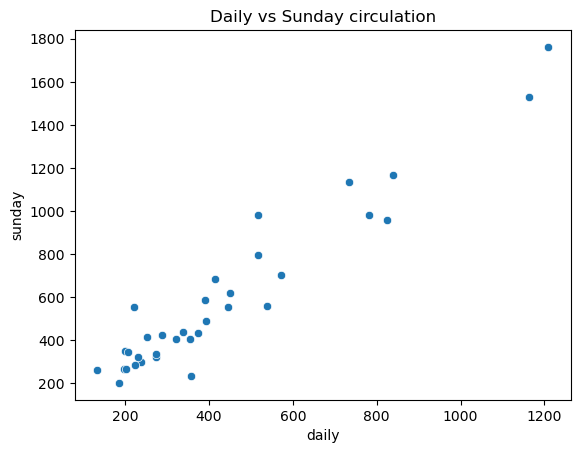

In [72]:
sns.scatterplot(data=df,x='daily',y='sunday')
plt.title('Daily vs Sunday circulation')
plt.show()

In [ ]:
2.normality test
#only for feature we will check distribution

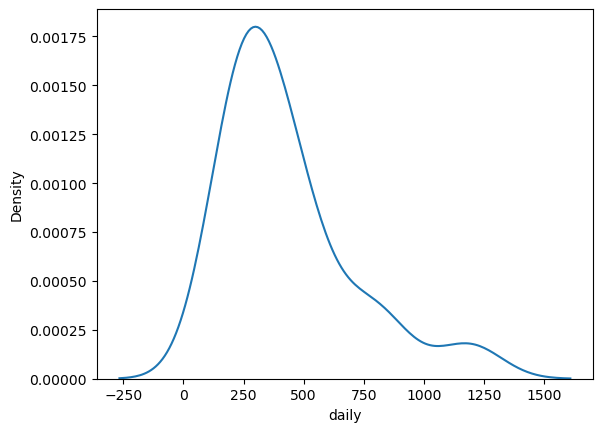

In [78]:
sns.distplot(a=df['daily'],hist=False)
plt.show()

In [ ]:
#right skew-not 100% normally distributed

In [ ]:
we have only 1 feature so no need to check multi-collinearity using-correlation matrix and VIF

In [ ]:
4.no time based input in input features

In [ ]:
linear regression model building using stats model and sklearn library

In [ ]:
in stats model,model building and model training happen at same time using OLS technique(ordinary lis square)

In [80]:
import statsmodels.formula.api as smf

In [88]:
#model building
#formula-(target-tilt-feature+feature+...)
#.fit() is for model training
linear_model = smf.ols(formula = 'sunday~daily',data=df).fit()
linear_model

In [90]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
#daily is slope(m)(slope will varies for feature)
#intercept = c or beta
#calculate y-calculated(y=mx+c) it won't be 100% accurate as it is not 100% normally distributed.

In [102]:
y=1.339*391.952+13.8
y

538.6237279999999

In [96]:
pred=linear_model.predict()
pred

array([ 538.93950861,  706.44270505,  490.27570976,  333.43128393,
        734.3074323 ,  996.88482623,  280.21379461,  352.27973085,
        290.0901718 ,  323.54686845,  616.37904075,  400.43845725,
        262.66889014, 1573.78341718,  609.4473566 ,  566.96500163,
        378.61316413, 1061.21926861, 1633.85220777, 1119.78623895,
        313.59412751,  489.22403367,  704.48940094,  309.19584396,
        466.21979157,  277.92020294,  192.33788451,  514.90100672,
        380.70847801,  777.96069796,  538.04725858,  284.2704509 ,
        444.72272856, 1137.72501956])

In [106]:
error=df.sunday-pred
error

0     -50.433509
1      91.855295
2    -255.191710
3     -33.980284
4    -175.214432
5     136.364174
6      68.530205
7      65.499269
8      54.431828
9      -0.462868
10      4.372959
11     22.866543
12    -60.054890
13    -42.256417
14    -55.968357
15    119.009998
16    -54.372164
17    -77.979269
18    128.162792
19   -159.478239
20    -28.983128
21    -81.464034
22    278.173599
23    247.804156
24    -25.296792
25     -9.860203
26     69.710115
27    -82.399007
28    -42.353478
29    -73.638698
30     47.633741
31    -16.489451
32    -36.379729
33     27.841980
Name: sunday, dtype: float64

In [ ]:
#model evaluation

In [110]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           6.02e-19
Time:                        12:07:15   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from p-value we reject the null hypothesis as 0.00<0.05

In [131]:
df1=pd.DataFrame(data={'daily':[256.78,398.56,653.98,444.19,985.12]})

In [133]:
df1

,daily
0,256.78
1,398.56
2,653.98
3,444.19
4,985.12


In [137]:
linear_model.predict(df1.daily)


0     357.847585
1     547.792344
2     889.982287
3     608.923528
4    1333.615432
dtype: float64